In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sneaker_data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
sneaker_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [8]:
order_amounts = np.array(sneaker_data['order_amount']) #this is a list of how much money was spent on each order
given_AOV = np.average(order_amounts)
print(f"${round(given_AOV, 2)} is the average order value that was given in the question.")

$3145.13 is the average order value that was given in the question.


This value simply tells us that customers tend to spend about 3145.13 in a single order. It doesn't give us any information on the average value of a sneaker. However this AOV is not a good metric for the average money spent on an order due to the existence of outliers. In the dataset, a majority of the orders are below 1000 with a few being incredibly high. Although there is only a few of these large orders, they cause this AOV metric to increase significantly. This causes the metric to seem unnecessarily higher than it should be.

This box plot illustrates the costs of each order taking into account all the outliers. Because of the outliers, the boxplot is heavily dilated and hard to see where the median, Q1, and Q3 values are located. For us to calculate a more reasonal AOV, we must remove these outliers.


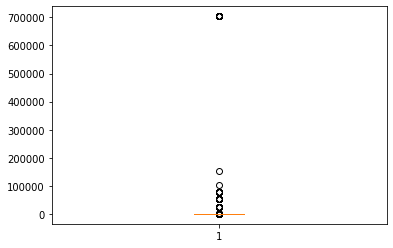

In [56]:
#here we will try to find a better more reasonable AOV
plt.boxplot(order_amounts);

The box plot above isn't the best... it illustrates the costs of each order taking into account all the outliers. Because of the outliers, the boxplot is heavily dilated and hard to see where the median, Q1, and Q3 values are located. For us to calculate a more reasonal AOV, we must remove these outliers.


Q1 value: 163.0, Median: 284.0, Q3 value: 390.0, IQR: 227.0
This boxplot illustrates the costs of each order excluding all the outliers. It is much easier to analyze and more clear when compared to the previous boxplot.


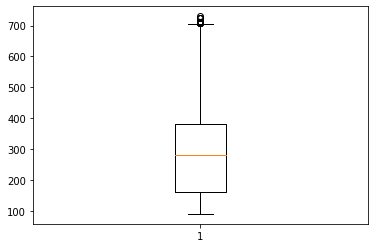

In [5]:
order_amounts_Q1 = np.percentile(order_amounts, 25)
order_amounts_median = np.median(order_amounts)
order_amounts_Q3 = np.percentile(order_amounts, 75)
interQuartileRange = order_amounts_Q3 - order_amounts_Q1
print(f"Q1 value: {order_amounts_Q1}, Median: {order_amounts_median}, Q3 value: {order_amounts_Q3}, IQR: {interQuartileRange}")
adjusted_order_amounts = [amount for amount in order_amounts if (amount < (order_amounts_Q3 + 1.5 * interQuartileRange) and amount > (order_amounts_Q1 - 1.5 * interQuartileRange))] #removes outliers
plt.boxplot(adjusted_order_amounts);

This boxplot is much better to look than the previous one. It illustrates the costs of each order excluding all the outliers. It is much easier to analyze and more clear when compared to the previous boxplot.

In [6]:
adjusted_AOV = np.average(adjusted_order_amounts)
print(f"When we calculate the AOV using the adjusted order values(no outliers), we get a more reasonable AOV of ${round(adjusted_AOV, 2)} which does not include any of the large orders.")

When we calculate the AOV using the adjusted order values(no outliers), we get a more reasonable AOV of $293.72 which does not include any of the large orders.


Instead of AOV(average order value), a better metric to use for this dataset would be average sneaker value. This metric can be calculated by summing up the total amount that was spent on sneakers from all stores and dividing by the number of sneakers that were bought from all the stores. Average sneaker value is a better metric than AOV, because the average sneaker value won't be affected by large orders(the outliers we excluded) like how the AOV was affected. However, outliers in sneaker prices will affect the average sneaker value. Average sneaker value will give us a good understanding about the sneaker market on shopify while average order value will help us understand sneaker customers as it will tell us how much most of them tend to spend.

In [7]:
total_amounts = np.array(sneaker_data['total_items']) #this is a list of how many sneakers were bought in each order
average_sneaker_value = np.sum(order_amounts) / np.sum(total_amounts)
print(f"${round(average_sneaker_value, 2)} is the average sneaker value based on the dataset.")

$357.92 is the average sneaker value based on the dataset.


If we look at the two metrics(average sneaker price and AOV), we can see that the average order value is 293.72 while the average sneaker price is 357.92, which is noticibly higher than the AOV. It logically doesn't make sense for the average price of a sneaker to be higher than the average amount of money spent on an order. This reason for this is because the average sneaker price is not adjusted for outliers while the AOV is adjusted. There are some sneakers that are very expensive and their prices are being included in the calculation for the average sneaker value. However, most people don't buy these sneakers in their orders which is why the average order value is smaller than the average sneaker price.